# Logistic Regression Gradient Descent (LRGD)


This notebook illustrates the implementation of a Logistic Regression gradient descent algorithm. Although the algorithm has the “Regression” in its name, it aims to solve a binary classification problem where its hypothesis is a logistic function.

$$ f(x) = \dfrac{1}{1+e^{-\theta^Tx}}$$

The cost function used for logistic regression is the average of the log loss across all training examples:

$$\mathcal{J}(\theta) = -\dfrac{1}{m} \left[\sum_{i=1}^m y^{(i)}\,log\, h_\theta(x^{(i)}) + (1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\right]$$

Derivatives of the cost function w.r.t $\theta$ :

$$\dfrac{\partial \mathcal J}{\partial \theta_j} = \dfrac{1}{m} \sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Gradient descent update :

$$ \theta_j := \theta_j - \alpha \dfrac{\partial \mathcal J}{\partial \theta_j}$$  

**Resource**

Andrew NG, [cs229-notes1 - Logistic regression](https://see.stanford.edu/materials/aimlcs229/cs229-notes1.pdf), stanford.edu


In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# import libraries and functions
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

To get an intuition, we draw the Cross-Entropy (CE) function.

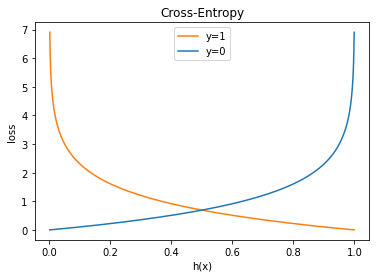

In [3]:
# visualize cross-entropy function
x = np.arange(0.001, 1, 0.001)
y = -np.log(x)
plt.plot(x,y, color='C1', label='y=1')
y = -np.log(1-x)
plt.plot(x,y, color='C0', label='y=0')
plt.legend()
plt.xlabel('h(x)')
plt.ylabel('loss')
plt.title('Cross-Entropy')
plt.show()

The loss function for a single training example is written as $L = -1 (y^{(i)}\,log\, h_\theta(x^{(i)}) + (1-y^{(i)})\,log\,(1-h_\theta(x^{(i)})))$.



In [4]:
# verify that when the model predicts close to 0 but the actual label is 1, the loss is a large positive value
-1 * np.log(0.0001) # loss is about 9.2

9.210340371976182

In [5]:
# verify that when the model predicts close to 1, but the actual label is 0, the loss is a large positive value
-1 * (1 - 0) * np.log(1 - 0.9999) # loss is about 9.2

9.210340371976294

## The Data

In [6]:
# generate data
X,y = make_blobs(n_samples=400,centers=2,n_features=2,random_state=0)

In [7]:
# split the data into training and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

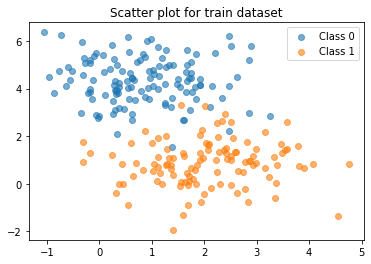

In [8]:
# plot the training data points
plt.title('Scatter plot for train dataset')
plt.scatter(X_train[(y_train==0),0], X_train[(y_train==0),1], alpha=0.6, label='Class 0')
plt.scatter(X_train[(y_train==1),0], X_train[(y_train==1),1], alpha=0.6, label='Class 1')
plt.legend()
plt.show()

## LRGD algorithm implementation

In [9]:
# define the function for visualizing learning curves
def learning_curve(costs):
    plt.title('LogisticRegressionGD Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.plot(costs, linewidth=2., label="train_loss")
    plt.show()

In [10]:
# define the target function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
# define the cost function
def cost_func(theta,X,y):
    m = len(X) #number of training examples
    H = sigmoid(np.sum(X * theta, axis=1)) #hypothesis
    J = sum(-y * np.log(H) - (1 - y)*np.log(1 - H)) / m #compute cost
    grad = np.dot(X.T, (H - y)) / m #compute gradient 
    return J, grad

In [12]:
def LogRegGD(X, y, alpha, n_epoch, learn_curve=False):
    """
    Parameters
    ----------
      X: the training examples
      y: the target labels
      alpha: the learning rate
      n_epoch: the number of epoches
      learn_curve: whether or not to plot a learning curve
    """
    costs = [] # collect costs for learning curve plot
    
    np.random.seed(1) # set the random seed to get reproducible result
    theta = np.random.uniform(-1, 1, X.shape[1]) # initializing the coefficients
    
    for epoch in range(n_epoch):
        cost, grad = cost_func(theta, X, y)
        theta = theta - alpha * grad # gradient descent update
        costs.append(cost)
        
    if learn_curve == True:
        learning_curve(costs)
           
    return theta

## Model Training

In [13]:
# Add ones to the first column for biases
X_train_b = np.hstack((np.ones(len(X_train)).reshape(-1,1),X_train))
X_test_b = np.hstack((np.ones(len(X_test)).reshape(-1,1),X_test))

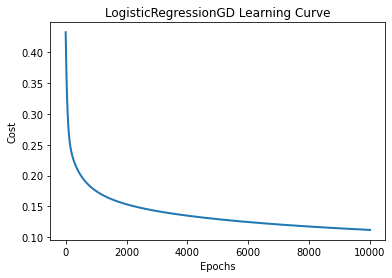

In [14]:
# Train the model
alpha = 0.01 # learning rate
n_epoch = 10000
theta = LogRegGD(X_train_b, y_train, alpha, n_epoch, True)

In [15]:
theta

array([ 2.47753602,  1.53299377, -2.00042919])

## Model Performance

In [16]:
# Make predictions on train dataset
preds = sigmoid(np.sum(X_train_b * theta, axis=1))
preds = [1 if p >= 0.5 else 0 for p in preds]
print('Accuracy on train dataset:', accuracy_score(y_train, preds))

Accuracy on train dataset: 0.9625


In [17]:
# Make predictions on test dataset
preds = sigmoid(np.sum(X_test_b * theta, axis=1))
preds = [1 if p >= 0.5 else 0 for p in preds]
accuracy_score(y_test, preds)

0.95625

## Decision Boundaries

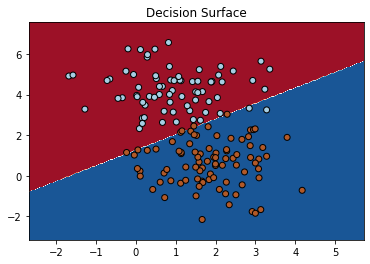

In [18]:
# Create meshgrid data points
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

data = np.hstack((np.ones(len(xx.ravel())).reshape(-1,1), np.c_[xx.ravel(), yy.ravel()]))
Z = sigmoid(np.sum(data * theta, axis=1))
Z = [1 if p >= 0.5 else 0 for p in Z]

# Plot the decision boundary
plt.contourf(xx, yy, np.array(Z).reshape(xx.shape[0], xx.shape[1]), cmap='RdBu')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='Paired')
plt.title('Decision Surface')
plt.show()

The logistic regression divides the feature space using a straight line. It is a linear model, after all.
However, we can add more depth to the decision surface by using the model to predict probabilities instead of class labels.

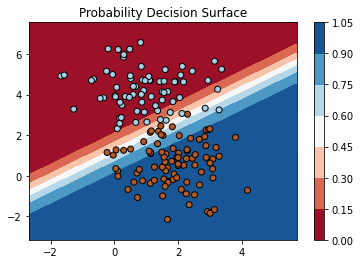

In [19]:
# Plot the decision boundary
Z = sigmoid(np.sum(data * theta, axis=1))
c = plt.contourf(xx, yy, np.array(Z).reshape(xx.shape[0], xx.shape[1]), cmap='RdBu')
plt.colorbar(c)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap='Paired')
plt.title('Probability Decision Surface')
plt.show()